c:\Users\madha\PycharmProjects\NLP-ML\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\madha\PycharmProjects\NLP-ML\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


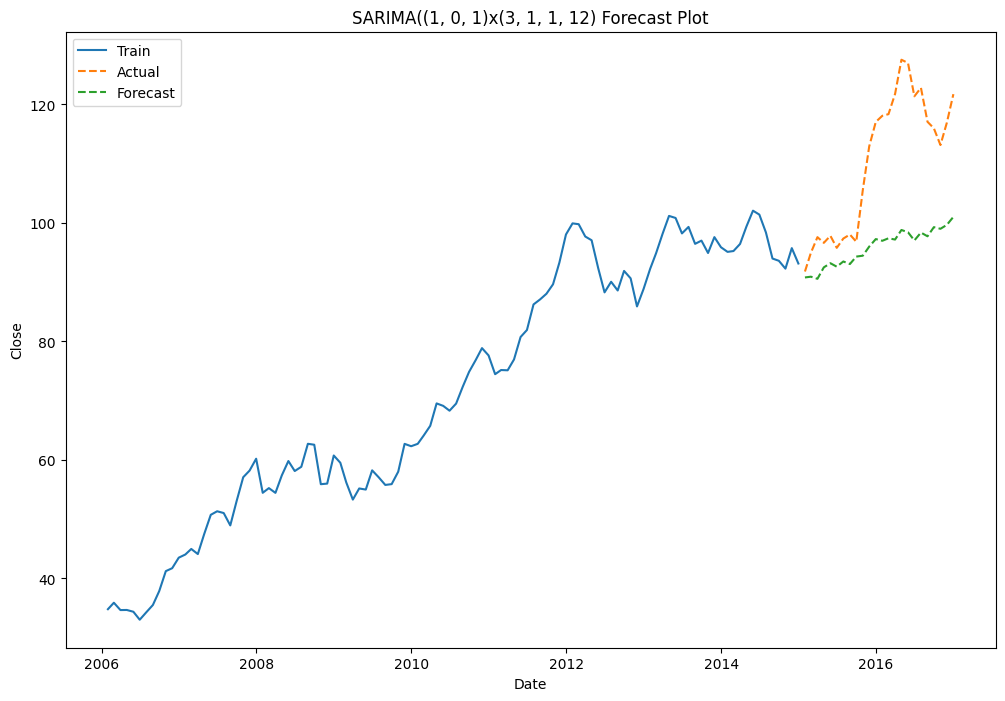

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

df = pd.read_csv('../ML471_S4_Datafile_Practice.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

train = df[df.index < '2015-01-01']
test = df[df.index >= '2015-01-01']

model = SARIMAX(train['Close'], order=(1, 0, 1), seasonal_order=(3, 1, 1, 12))
fitted_model = model.fit()

forecast = fitted_model.forecast(steps=len(test))

plt.figure(figsize=(12, 8))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index, test['Close'], label='Actual', linestyle='--')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('SARIMA((1, 0, 1)x(3, 1, 1, 12) Forecast Plot')
plt.legend()
plt.show()